# AI in Medicine: Data Science - Machine Learning
## Python programming: Machine learning using *scikit-learn*

- **Tutor:** Roshan Prakash Rane, AG Ritter, Charité - Universitätsmedizin Berlin (roshan-prakash.rane@charite.de)
- **Target audience**: Medical students from Charité
- **Course date**: February 2021

**Note:** First, **please ensure that you're using the Python 3.6 kernel**. You can check that in the top right corner of your browser window. If you're using a different Version, go to the Tab "Kernel" --> "Change Kernel" and select "Python 3.6". <br>

**Executing the below cell should return a version higher than 3.6.0**

In [1]:
!python --version

Python 3.8.5


## 1. Aims of this session

This session will introduce basic concepts of **machine learning** using a practical example and a programming tutorial. We will use the Python programming language. Specifically, we will learn to use Python's machine learning package '*scikit-learn*' to train different machine learning models and evaluate their performance. 

We will be using the [diabetes dataset](https://www.kaggle.com/uciml/pima-indians-diabetes-database). We will train few machine learning models to predict if a subject has diabetes from characteristics such as blood pressure, blood glucose level, BMI, age  etc. 

## 2. Learning goals

By the end of this session, you should be familiar with:

- Reading a dataset, exploring the different data columns and cleaning it for machine learning.
- Cross validation: Why we split our dataset into 'training' data and 'test' data and how to do it.
- Training machine learning models.
- Compare the performance of different machine learning models and determine which one is better.
- Interpreting the predictions of a machine learning model.

## 3. References

Documentation for python libraries used in this notebook:

- https://numpy.org/doc/
- https://scikit-learn.org/stable/
- https://pandas.pydata.org/pandas-docs/stable/
- https://matplotlib.org/

Documentation for classifiers:

- https://en.wikipedia.org/wiki/Logistic_regression
- https://en.wikipedia.org/wiki/Support_vector_machine

Documentation for metrics used:

- https://en.wikipedia.org/wiki/Accuracy_and_precision
- https://en.wikipedia.org/wiki/Precision_and_recall
- https://en.wikipedia.org/wiki/F1_score
- https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5

Further learning material:

- StatQuest's Machine learning lectures on youtube: ([click here](https://www.youtube.com/playlist?list=PLblh5JKOoLUICTaGLRoHQDuF_7q2GfuJF))<br>(Episodes: Introduction, Cross-validation, Confusion Matrix, Sensitivity and Specificity, k-nearest neighbor, linear / logistic regression, support vector machines)


## 4. Theory
The theory will be covered alongside as we walk-through the practical sections.

## 5. Practical
5.1 Data loading and exploration<br>
5.2 Data preprocessing<br>
5.3 Classification or regression?<br>
5.4 Splitting the data into 'training' set and a 'test' set<br>
5.5 

### 5.1 Data loading and exploration

* The dataset we will be exploring in this tutorial is from the Pima Indians Diabetes Database that is freely [available here](https://www.kaggle.com/uciml/pima-indians-diabetes-database).
* The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements.
* We will be using a subset of the larger database for ease-of-use. 
* Our subset is selected such that, all subjects in it are females, at least 21 years old, and of Pima Indian heritage.

Source publication for reference:<br>
*Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.*

In [2]:
# Download the dataset from the github to the Colab environment
!mkdir -p data # create a new folder called 'data'
!wget -q -P data https://github.com/volkamerlab/ai_in_medicine/raw/update-2021.02/data/diabetes.csv # download the file to 'data' folder

zsh:1: command not found: wget


Let us first load the dataset and try to understand the different columns. 

In [3]:
# First, import the Pandas, NumPy and matplotlib libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [4]:
# load the csv file as a pandas dataframe
df = pd.read_csv('data/diabetes.csv')

In [5]:
#see the loaded dataframe 
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


As we can observe,
- the dataset has 768 subjects and each subject have 9 variables:
    1. Pregnancies
    2. Glucose 
    3. BloodPressure 
    4. SkinThickness 
    5. Insulin 
    6. BMI 
    7. DiabetesPedigreeFunction 
    8. Age 
    9. Outcome
- The last column "Outcome" denotes the diabetic information. A value of '1' here denotes that the subject has diabetes.
- The rest of the 8 columns are medical predictor variables that might or might not be associated with diabetes.

**Our task here is to use these 8 medical predictor variables and try and predict if the subject has diabetes or not** (i.e. to predict the 'outcome' variable):

<img src="https://github.com/volkamerlab/ai_in_medicine/raw/update-2021.02/images/MLflowchart.png">

*([link to source](https://github.com/volkamerlab/ai_in_medicine/raw/update-2021.02/images/MLflowchart.png))*

**Discussion:** 
1. What variables among these do you think are the most telling medically for diabetes diagnosis? 
2. Which variables, according to you, will the machine learning model find most useful for diabetes diagnosis?

Let us try to visualize the 'distribution' of the diabetes column in our data

In [6]:
# count the subject with and without diabetes
label = df["Outcome"].astype(int) # first, select the outcome column from the dataframe
label_counts = label.value_counts()  # next use the pandas 'value_counts()' method 
# print the result
label_counts

0    500
1    268
Name: Outcome, dtype: int64

Using the `values_counts()` method, we can print how many of each class we have and calculate their percentages. <br>

Now, let's make these numbers more intuitive by plotting a 'bar' graph showing their counts.

We can use the `plot()` function of pandas to do this.

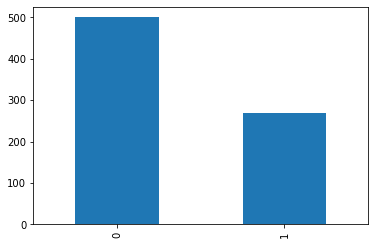

In [7]:
ax = label_counts.plot(kind="bar")

Ok, we can improve this graph a bit more and make it readable for anyone else who would look at it. 

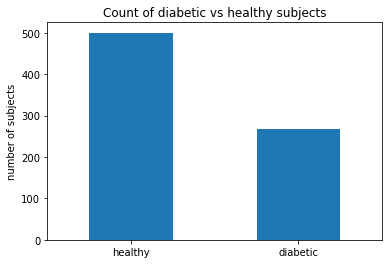

In [8]:
ax = label_counts.plot(kind="bar", 
                       title="Count of diabetic vs healthy subjects",
                       ylabel="number of subjects", 
                       rot=0)
tick_names = ax.set_xticklabels(["healthy", "diabetic"])

Now, let's visualize the distributions of the different medical variables that will be provided as input to our machine learning model.

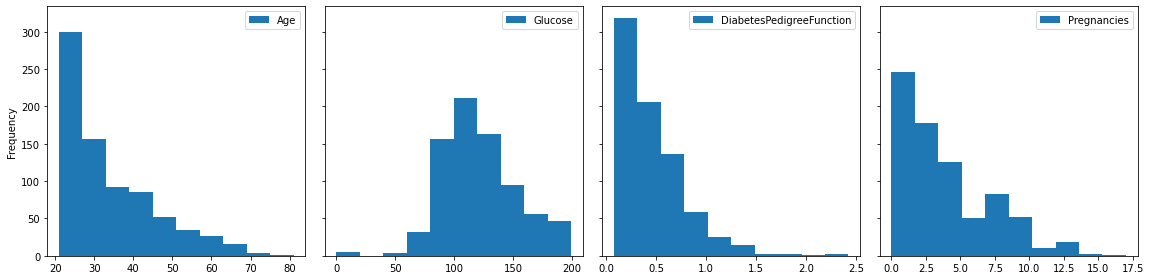

In [9]:
# first, create a canvas on which 1 x 4 graphs can be drawn
f, axes = plt.subplots(1, 4, sharey=True, figsize=(16,4))

df.plot(y="Age", kind="hist", ax=axes[0])
df.plot(y="Glucose", kind="hist", ax=axes[1])
df.plot(y="DiabetesPedigreeFunction", kind="hist", ax=axes[2])
df.plot(y="Pregnancies", kind="hist", ax=axes[3])

plt.tight_layout()
plt.show()

**Exercise:** Now it's your turn. Similar to what we did in the previous cell, plot the distributions of the remaining 4 variables in the dataset:
1. BMI
2. SkinThickness
3. BloodPressure
4. Insulin

In [10]:
# YOUR CODE GOES HERE

# hint: start by copying the code from the above cell. Next, modify the column names.

<!-- f, axes = plt.subplots(1, 4, sharey=True, figsize=(16,4))

df.plot(y="BMI", kind="hist", ax=axes[0])
df.plot(y="SkinThickness", kind="hist", ax=axes[1])
df.plot(y="BloodPressure", kind="hist", ax=axes[2])
df.plot(y="Insulin", kind="hist", ax=axes[3])

plt.tight_layout()
plt.show() -->

### 5.2 Preprocessing the data

It is a very rare occurance that datasets are clean, complete, and in the right shape.  Either due to human errors or due to systemic issues, in practice, you will come across datasets that need to be preprocessed before they can be used to train a machine learning model.

Some of the prominent preprocessing steps include:
* Dropping non-numeric values
* Cleaning unneeded columns
* Converting measurement units
* Reducing noise using smoothing functions
* Standardizing and normalizing variable values: covered in the theory session

**Discussion:** Do you find any such discrepancies in our dataset so far?

Some subjects have 'Glucose' value as '0' which can't be the case. Maybe the data was not collected for these subjects.

In [11]:
# print the count of subjects with Glucose == 0
glucose_zero = (df['Glucose'] == 0)
glucose_zero

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Name: Glucose, Length: 768, dtype: bool

In [12]:
glucose_zero.value_counts()

False    763
True       5
Name: Glucose, dtype: int64

Let's drop these subjects from our data as they are probably not very reliable

In [13]:
# select only the subjects who have a 'Glucose' value 
df_clean = df[(df['Glucose'] != 0)]
df_clean

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


It is the same case with 'BloodPressure' where some subjects have '0'. Let's remove them too.

In [14]:
df_clean = df_clean[(df_clean['BloodPressure'] != 0)]

**Exercise:** Similarly, lets also remove subjects with BMI=0 as those are also probably incoherent data.

In [15]:
# YOUR CODE GOES HERE

<!--  df_clean = df_clean[(df_clean['BMI'] != 0)] -->

In [16]:
df_clean

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### 5.3 Classification or regression?

Let's try to look at our data again. <br>
This time, let's use a 'scatter plot' to compare how 2 input variable relate with the output 'diabetes' variable.

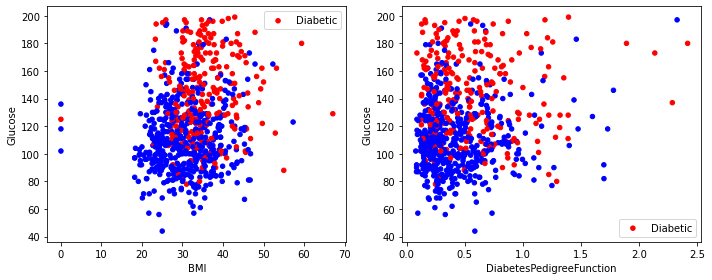

In [17]:
f, axes = plt.subplots(1, 2, figsize=(10,4))

# set a red color for diabetic subjects and blue for healthy subjects
label = df_clean['Outcome'].map({0:'blue', 1:'red'})

# plot BMI vs BloodGlucose 
ax1 = df_clean.plot(x="BMI", y="Glucose", c=label, kind="scatter", ax=axes[0])
ax1.legend(["Diabetic", "Healthy"])

# plot DiabetesPedigreeFunction vs BloodGlucose 
ax2 = df_clean.plot(x="DiabetesPedigreeFunction", y="Glucose", c=label, kind="scatter", ax=axes[1])
ax2.legend(["Diabetic", "Healthy"])

plt.tight_layout()
plt.show()

Is our task a classification task or a regression task?

<img src="https://github.com/volkamerlab/ai_in_medicine/raw/update-2021.02/images/classandregress.png" width="700" />

*([link to source](http://tonyeiyalla.com/images/classandregress.png))*

**Discussion:** 
1. Do you see a correlation between the "BMI" and "Glucose" scores?
2. What about between "BMI" and "DiabetesPedigreeFunction"?
3. If you had to draw a line to differentiate between diabetic and healthy subjects in the first plot, where would you put it?
4. Are we doing classification or regression?
5. If we were trying to predict 'Glucose' from 'BMI', would we be doing a classification or a regression?

Define the 'X' and y for our machine learning model:

In [18]:
X = df_clean[["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]].values
y = df_clean[["Outcome"]].values

### 5.4 Splitting the data into 'training' set and 'test' set

### Why do we need a test set?

Over-fitting problem in a classification task vs a regression task
<table>
    <tr>
        <td>
            <img src="https://github.com/volkamerlab/ai_in_medicine/raw/update-2021.02/images/tuning.png" width="300" />
        </td>
        <td>
            <img src="https://github.com/volkamerlab/ai_in_medicine/raw/update-2021.02/images/fitting_data.png" width="800" />
        </td>
    </tr>
</table>

*([link to source](https://github.com/volkamerlab/ai_in_medicine/raw/update-2021.02/images/tuning.png))*
*([link to source](https://github.com/volkamerlab/ai_in_medicine/raw/update-2021.02/images/fitting_data.png))*

Therefore, we split our dataset into 2 subsets: 
1. A larger subset on which we will train our model called the 'training' set. 
2. A smaller subset on which we will 'test' the model. It is important that we evaluate our model on a subset of the data it has never seen before to ensure that we are not overfitting the data and that our model can generalize well to unseen data.

Let us use 20% of our data as the test set. The remainding 80% are used to train the classifer. These ratios may vary depending on the size of the dataset we are using, but 20% to 80% is a good starting point.

In [19]:
# find out how many subject form '80%' in our data
round(len(X)*80/100)

582

In [20]:
x_train = X[:579]
x_test = X[579:]

y_train = y[:579]
y_test = y[579:]

(x_train.shape), (x_test.shape), (y_train.shape), (y_test.shape)

((579, 8), (149, 8), (579, 1), (149, 1))

Python has a machine learning library called '*sklearn*' that provides several convinient functions for machine learning:<br>
<img src="https://github.com/volkamerlab/ai_in_medicine/raw/update-2021.02/images/Scikit_learn_logo.png" width="300" /> 
*([link to source](https://en.wikipedia.org/wiki/Scikit-learn#/media/File:Scikit_learn_logo_small.svg))* <br>

*sklearn* library has a function called `train_test_split()` that can be used for splitting our dataset.

In [21]:
# import function for splitting our data 
from sklearn.model_selection import train_test_split

# Split the features and labels intro training and test sets by setting the test_size variable to 20%
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

(x_train.shape), (x_test.shape), (y_train.shape), (y_test.shape)

((582, 8), (146, 8), (582, 1), (146, 1))

### 5.5 Train our Models

Lets use try 3 different machine learning models for learning on our training data:
1. Linear Support Vector Machine Classifier (LinearSVC)
2. Non-linear Support Vector Machine Classifier (SVC)
3. Logistic Regression Classifier

#### 5.5.1 Linear Support Vector Machine Classifier (LinearSVC)
<img src="https://github.com/volkamerlab/ai_in_medicine/raw/update-2021.02/images/hyperplane.png" width="400" /> 

*([link to source](https://github.com/volkamerlab/ai_in_medicine/raw/update-2021.02/images/hyperplane.png))* 


In [22]:
# import model classe from sklearn
from sklearn.svm import LinearSVC

# Create a model (also called creating an 'instance' of a model class in programming lingo) 
linsvc = LinearSVC() #max_iter=200

# fit the model to our train data using a class method
linsvc.fit(x_train, y_train) #.ravel()

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC()

In [23]:
y_train = y_train.ravel()
y_test = y_test.ravel()

Reading the warning message from python, it appears as though our linear SVC did not converge. This may imply that our data is not linearly separable and that our other two classifiers might be better suited the for the classification task. Lets forget the linear SVC and try our the other classifiers.

#### 5.5.2 Non-linear Support Vector Machine Classifier (SVC) 
Linearly seperable task vs non-linearly seperable task:
<table>
    <tr>
        <td>
            <img src="https://github.com/volkamerlab/ai_in_medicine/raw/update-2021.02/images/linear_sep.png" width="300" />
        </td>
        <td>
            <img src="https://github.com/volkamerlab/ai_in_medicine/raw/update-2021.02/images/non-linear_sep.png" width="300" />
        </td>
    </tr>
</table>

(*[link to source](https://github.com/volkamerlab/ai_in_medicine/raw/update-2021.02/images/linear_sep.png)*)
(*[link to source](https://github.com/volkamerlab/ai_in_medicine/raw/update-2021.02/images/non-linear_sep.png)*)

<img src="https://github.com/volkamerlab/ai_in_medicine/raw/update-2021.02/images/sphx_glr_plot_iris_svc_001.png" width="700" />
(*[link to source](https://github.com/volkamerlab/ai_in_medicine/raw/update-2021.02/images/sphx_glr_plot_iris_svc_001.png)*)

This is good for separating non-linearly separable data.

In [24]:
# import model classe from sklearn
from sklearn.svm import SVC

# Instantiate an object of the model class
svc = SVC(probability=True) # We set probability to True when instantiating our SVC class in order to get a probability estimate of the labels.


# fit the model to our train data using a class method
svc.fit(x_train, y_train)

SVC(probability=True)

#### 5.5.3 Logistic Regression Classifier

A logistic regression classifier is also good for separating non-linearly separable data. We set the max iterations of our logistic classigier to 200 when we instantiate our class because it did not converges with the default value of 100.

<img src="https://github.com/volkamerlab/ai_in_medicine/raw/update-2021.02/images/logistic_reg.png" width="400" /> *([link to source](https://github.com/volkamerlab/ai_in_medicine/raw/update-2021.02/images/logistic_reg.png))* 


In [25]:
# import model from sklearn
from sklearn.linear_model import LogisticRegression

# Instantiate an object of the model class
logreg = LogisticRegression(max_iter=200)

# fit the model to our train data using a class method
logreg.fit(x_train, y_train)

LogisticRegression(max_iter=200)

Now that we have two model that have been fit to our training data, we can use our test data to evaluate them.

### 5.6 Evaluate our Models


#### 5.6.1 Make predictions

Next, we can make predictions on the test set that we will later compare to the respective true labels to evaluate of our model.

In [26]:
# import useful functions from the metrics module to evaluate our model
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

In [27]:
# use the predict() method from our model classes to predict labels given the test set of features x_test.
y_pred_svc = svc.predict(x_test)
y_pred_log = logreg.predict(x_test)

#### 5.5.2 Accuracy

$\text{accuracy} = \frac{tp + tn}{tp + fp + tn + fn}$, is a measure of how well our classifier can determine the true labels of inputs. <br><br>
Here we will compute the accuracies of both of our models.

In [28]:
# we are using the model class method score() to return the accuracy of predictions from each model.
print('Accuracy of Support Vector classifier on test set: {:.1f}%'.format(svc.score(x_test, y_test)*100))
print('Accuracy of logistic regression classifier on test set: {:.1f}%'.format(logreg.score(x_test, y_test)*100))

Accuracy of Support Vector classifier on test set: 77.4%
Accuracy of logistic regression classifier on test set: 74.7%


Although accuracy is a common metric, it often does not tell the whole story.

We need other ways to asses how well our classifier performs.

#### 5.5.3 Outcomes of a classifier

_Successful predictions_ are only one of the possible outcomes of a prediction from a classifier. These outcomes can be generalized using the following four classes:

- True positives
- False positives
- True negatives
- False negatives

<table>
    <tr>
        <td>
            <img src="https://github.com/volkamerlab/ai_in_medicine/raw/update-2021.02/images/confusion_matrix.png" width="500" />
        </td>
        <td>
            <img src="https://github.com/volkamerlab/ai_in_medicine/raw/update-2021.02/images/confusion_matrix_pregnancy.png" width="500" />
        </td>
    </tr>
</table>

(*[link to source](https://dzone.com/articles/understanding-the-confusion-matrix)*)

#### 5.5.4 Confusion Matrices

We can visualize the distribution of prediction classes predicted using a classifier by plotting a confusion matrix. We now use the plot_confusion_matrix function we imported above to visualize the distribtion of True Positives, False Positives, False Negatives, True Negatives for both of our classifiers.

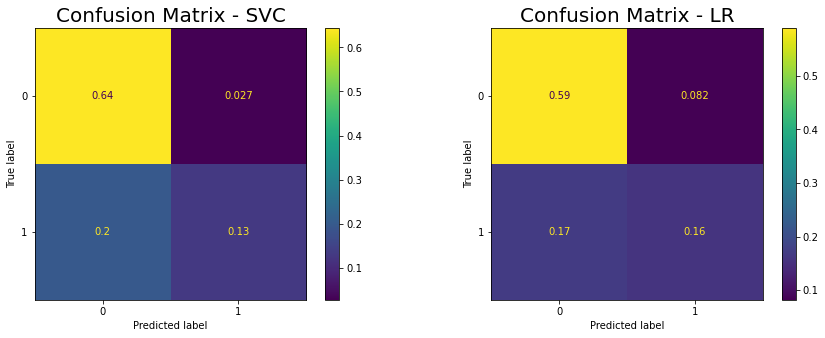

In [29]:
# Check the documentation to know what variables to use!
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15, 5))
plot_confusion_matrix(svc, x_test, y_test, normalize='all', ax=ax1)
ax1.set_title('Confusion Matrix - SVC', fontsize=20)
plot_confusion_matrix(logreg, x_test, y_test, normalize='all', ax=ax2)
ax2.set_title('Confusion Matrix - LR', fontsize=20)

# create directory to contain results
fig.savefig(
    'results/week1_session4_intro_to_ml_and_scikit-learn/confusion_matrices'
);

#### 5.5.5 Receiver Operating Characteristic (ROC) Curve

The ROC curve is a graph that shows the performance of a classification model at all thresholds. It is a common choice for assessing a binary classifier. The ROC curve is a plot of the True Positive Rate (recall) vs the False Positive Rate. The dotted red line indicates the performance of a random classifier that has a 50% chance of outputting either label. The area under the curve (AUC) of the ROC curve is a measure that tells us how well our classifier can distinguish between the classes.

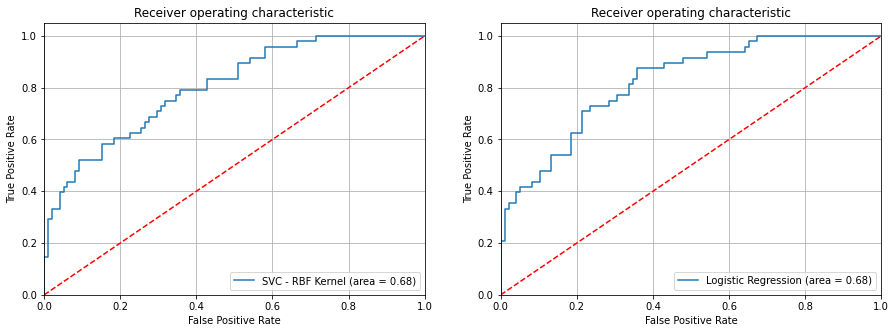

In [30]:
# create Figure, Axes objects and set figure dimensions
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15, 5))


# compute and plot the AUC and ROC values for the support 
# vector classifier
svc_roc_auc = roc_auc_score(y_test, svc.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, svc.predict_proba(x_test)[:,1])


ax1.plot(
    fpr, tpr, label='SVC - RBF Kernel (area = %0.2f)' % svc_roc_auc
)
ax1.plot([0, 1], [0, 1],'r--')
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.05])
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('Receiver operating characteristic')
ax1.legend(loc="lower right")
ax1.grid()


# compute and plot the AUC and ROC values for the logistic 
# regression classifier
logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])


ax2.plot(
    fpr, 
    tpr, 
    label='Logistic Regression (area = %0.2f)' % logit_roc_auc
)
ax2.plot([0, 1], [0, 1],'r--')
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('Receiver operating characteristic')
ax2.legend(loc="lower right")
ax2.grid()

fig.savefig('results/week1_session4_intro_to_ml_and_scikit-learn/roc');

**Discussion:** Which model do you think is better? 

In practice, data scientists also use n-fold cross-validation and permutation tests to better compare models, tune hyperparameters, and get better estimates for our metrics. <br>
This will result in a clearer picture of how the models preform, and which models to use for classification of novel data.

## 6. Summary

Lets briefly revisit some topics covered in this module:

- Machine learning is a task of learning models that can map input variables to desired outputs with high precision; features to labels
    - classification: outputs are discrete variables or classes
    - regression: outputs are continuous variables
- we can load our dataset in python from a csv file using pandas and explore it using different plotting types
    - normally we would have to preprocess our data
- data is split up into training and test sets so that we can evaluate the model's generalization capacity on unseen data
- models are trained on the training set and their performance evaluated on the test set
- it is generally a good idea to use different metrics when evaluating a model 
    - this leads to a better understanding of how the model performs


## 7. Exercises
### Let us now use the different columns to predict if a subject is above the age of 40 or not. 
Going through these exercises, you will develope a better undertanding of how to train and test models given a dataset. We suggest that you use the above code as a reference but do **NOT** simply copy and paste. You will gain a deeper understanding if your type the code yourself, implement the functions, and use docs to understand how functions work and what parameters to pass in.

In [31]:
# add diabetes as another input variable
df_clean = df_clean.rename(columns={"Outcome":"Diabetes"})
# Make age the new 'Outcome' variable
df_clean["Outcome"] = (df_clean["Age"] >= 40).astype(int)
df_clean = df_clean.drop(columns=["Age"])
df_clean

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Diabetes,Outcome
0,6,148,72,35,0,33.6,0.627,1,1
1,1,85,66,29,0,26.6,0.351,0,0
2,8,183,64,0,0,23.3,0.672,1,0
3,1,89,66,23,94,28.1,0.167,0,0
4,0,137,40,35,168,43.1,2.288,1,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,0,1
764,2,122,70,27,0,36.8,0.340,0,0
765,5,121,72,23,112,26.2,0.245,0,0
766,1,126,60,0,0,30.1,0.349,1,1


### 7.1 Create the new X (features) and y (labels) variables

In [32]:
# YOUR CODE GOES HERE
X = df_clean[["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Diabetes"]].values
y = df_clean[["Outcome"]].values

### 7.2 Plot the new label's distribution or counts

In [33]:
# Note: Play around with the plt methods and parameter to see how it changes the 
#       display of your plots.


# YOUR CODE GOES HERE

### 7.3 Split your data into training and test sets

You should use the train_test_split function imported from sklearn. We want you to use a test set size of 20%.

In [34]:
# Note: Once you have finished all the exercises, vary percent of data used for the test set
#       and see how it affects the performance of your models.


# YOUR CODE GOES HERE

### 7.4 Train your Models

Implement the non-linear SVC and Logistic Regression models and fit them to the training data.

In [35]:
# Hint: Remember to compute the probabilities for SVC and make sure that the logistic regression 
#       model converges (by increasing the max_iter argument if necessary).


# YOUR CODE GOES HERE

### 7.5 Evaluate your Models

#### 7.5.1 Predict the labels of the test set using both classifiers

In [36]:
# Hint: Use the predict method from the classifier class


# YOUR CODE GOES HERE

#### 7.5.3 Compute and print the Accuracy both models

In [37]:
# Hint: Use the score method from each model class.


# YOUR CODE GOES HERE

#### 7.5.3 Plot the confusion matrices from each classifier

In [38]:
# Hint: Use the plot_confusion_matrix function import from sklearn


# YOUR CODE GOES HERE

#### 7.5.4 Plot the ROC curves and compute the AUC for both classifiers

In [39]:
# Hint: Use the roc_auc_score and roc_curve functions


# YOUR CODE GOES HERE